In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import ticker, cm
import cmocean as cmo
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

In [185]:

u = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/OSCAR_zonal_current_2015.nc')
v = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/OSCAR_meridional_current_2015.nc')


current = xr.merge([u,v])
wind = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/New_ERA5.nc')
chl = xr.load_dataset('/home/pab21003/class_marn5895/Final_Project/Data/dataset-oc-glo-bio-multi-l4-chl_4km_monthly-rep_1637967441442.nc')
ssh = xr.open_dataset('/home/pab21003/class_marn5895/Final_Project/Data/dataset-duacs-rep-global-merged-allsat-phy-l4-monthly_1637960787662.nc')

In [179]:

def make_cf_compliant(ds):
    
    
    '''
    This function converts the non-CF compliant coordinates such as longitude, latitude, and time to CF compliant corrdinates.
    '''
    
    
    non_cf_lons = ['LON1_1021',  'lon']
    non_cf_lats = ['LAT','lat']
    non_cf_time = ['TIME']

    cf_names = ['longitude', 'latitude', 'time']
    non_cf_vars = [non_cf_lons, non_cf_lats, non_cf_time]
    

    # first check for every variable names
    for n in range(len(cf_names)): 
        
        # if it is non-cf comliant then convert the variable to cf-comliant variable 
        
        if any(var in ds.coords for var in non_cf_vars[n]):
            print('%s : was non-CF compliant'%cf_names[n])
            for i in non_cf_vars[n]:
                if i in ds.coords:
                    ds = ds.rename(({'%s'%i:'%s'%cf_names[n]}))

        else:
            
            print('%s : CF Compliant'%cf_names[n])
         
    return ds

In [165]:
wind

<xarray.Dataset>
Dimensions:    (longitude: 561, latitude: 241, time: 12)
Coordinates:
  * longitude  (longitude) float32 140.0 140.2 140.5 140.8 ... 279.5 279.8 280.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2015-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-11-30 21:01:43 GMT by grib_to_netcdf-2.23.0: /opt/ecmw...

In [180]:
u = make_cf_compliant(u)

longitude : was non-CF compliant
latitude : was non-CF compliant
time : was non-CF compliant


In [75]:
# u.keys().endswith('LON1_1021')

# import functools
# import operator
#str.join(u.data_vars)

# functools.reduce(operator.add, (u.data_vars))

ds_coords = u.coords
coords = ''
for item in ds_coords:
    coords = coords + ' ' + item
    

In [123]:
if any(lats in u.coords for lats in non_cf_lats):
    print('Non-CF Compliant')
    for i in non_cf_lats:
        if i in u.coords:
            u = u.rename(({'%s'%i:'latitude'}))

else:
    print('CF Compliant')

Non-CF Compliant


In [96]:
for i in non_cf_lons:
    print(i)
    print(coords.find(i))

LON1_1021
1
lon
-1


In [106]:
u

<xarray.Dataset>
Dimensions:         (longitude: 1021, bnds: 2, LAT: 481, LEV: 1, TIME: 73)
Coordinates:
  * longitude       (longitude) float64 20.0 20.33 20.67 ... 359.3 359.7 360.0
  * LAT             (LAT) float64 -80.0 -79.67 -79.33 -79.0 ... 79.33 79.67 80.0
  * LEV             (LEV) float64 15.0
  * TIME            (TIME) datetime64[ns] 2015-01-01 ... 2016-01-01
Dimensions without coordinates: bnds
Data variables:
    LON1_1021_bnds  (longitude, bnds) float64 19.83 20.17 20.17 ... 359.8 360.2
    LAT_bnds        (LAT, bnds) float64 -80.17 -79.83 -79.83 ... 79.83 80.17
    TIME_bnds       (TIME, bnds) datetime64[ns] 2014-12-29T11:09:59.999998 .....
    U               (TIME, LEV, LAT, longitude) float32 ...
Attributes:
    history:      FERRET V6.5  26-Nov-21
    Conventions:  CF-1.0

In [131]:
u

<xarray.Dataset>
Dimensions:         (longitude: 1021, bnds: 2, latitude: 481, LEV: 1, TIME: 73)
Coordinates:
  * longitude       (longitude) float64 20.0 20.33 20.67 ... 359.3 359.7 360.0
  * latitude        (latitude) float64 -80.0 -79.67 -79.33 ... 79.33 79.67 80.0
  * LEV             (LEV) float64 15.0
  * TIME            (TIME) datetime64[ns] 2015-01-01 ... 2016-01-01
Dimensions without coordinates: bnds
Data variables:
    LON1_1021_bnds  (longitude, bnds) float64 ...
    LAT_bnds        (latitude, bnds) float64 ...
    TIME_bnds       (TIME, bnds) datetime64[ns] ...
    U               (TIME, LEV, latitude, longitude) float32 ...
Attributes:
    history:      FERRET V6.5  26-Nov-21
    Conventions:  CF-1.0

In [130]:
#wind = wind.sel(longitude=slice(140,260),latitude=slice(30,-30))
#windspeed = np.sqrt(wind.u10**2 + wind.v10**2)


    
if any(lons in u.coords for lons in non_cf_lons):
    print('Non CF ')
    for i in non_cf_lons:
        if i in u.coords:
            u = u.rename(({'%s'%i:'longitude'}))
            
else:
    print('CF Compliant')
    
if any(lats in u.coords for lats in non_cf_lats):
    print('Non-CF Compliant')
    for i in non_cf_lats:
        if i in u.coords:
            u = u.rename(({'%s'%i:'latitude'}))

else:
    print('CF Compliant')
    





Non CF 
Non-CF Compliant


In [117]:
surf_current_speed = np.sqrt(u.U**2 + v.V**2)

In [118]:
u = u.sel(LON1_1021=slice(140,280),LAT=slice(-30,30)).resample(TIME='1M').mean(dim='TIME').sel(TIME='2015').rename({'LON1_1021':'longitude','LAT':'latitude'})
v =v.sel(LON1_1021=slice(140,280),LAT=slice(-30,30)).resample(TIME='1M').mean(dim='TIME').sel(TIME='2015').rename({'LON1_1021':'longitude','LAT':'latitude'})

In [119]:
surf_current_speed = surf_current_speed.sel(LON1_1021=slice(140,280),LAT=slice(-30,30))
surf_current_speed = surf_current_speed.resample(TIME='1M').mean(dim='TIME').sel(TIME='2015')

In [120]:
ssh = ssh.sel(longitude=slice(140,280),latitude=slice(-30,30))

In [121]:
chl=chl.CHL.isel(time=0)
chl.coords['lon'] = (chl.coords['lon'] + 360) % 360
chl= chl.sortby(chl.lon)

In [122]:
chl = chl.sel(lon=slice(140,280))

In [123]:
wind = wind.interp(longitude=u.longitude)

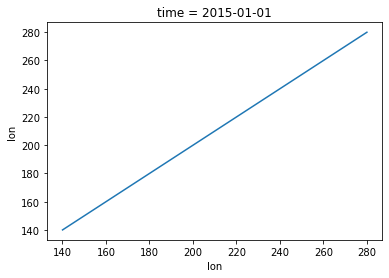

In [59]:
chl.lon.plot()

In [ ]:
def divergence(ds):
    du = np.diff(ds.u.)

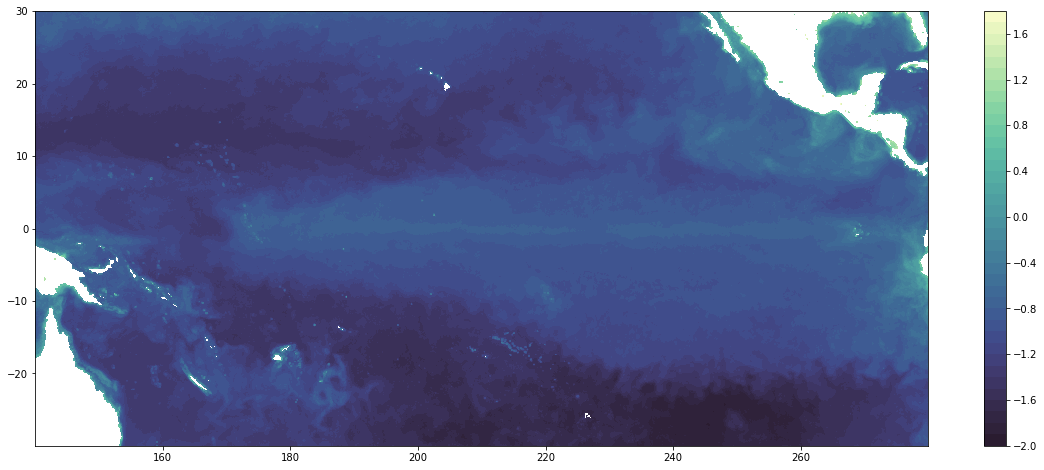

In [85]:
plt.figure(figsize=(20,8))
np.log10(chl)
plt.contourf(chl.lon,chl.lat,np.log10(chl),40,cmap=cmo.cm.deep_r)
plt.colorbar()

In [26]:
trans = ccrs.PlateCarree(central_longitude=180)
k_map_kwargs = dict(vmin=10, vmax=5e3, transform=trans)

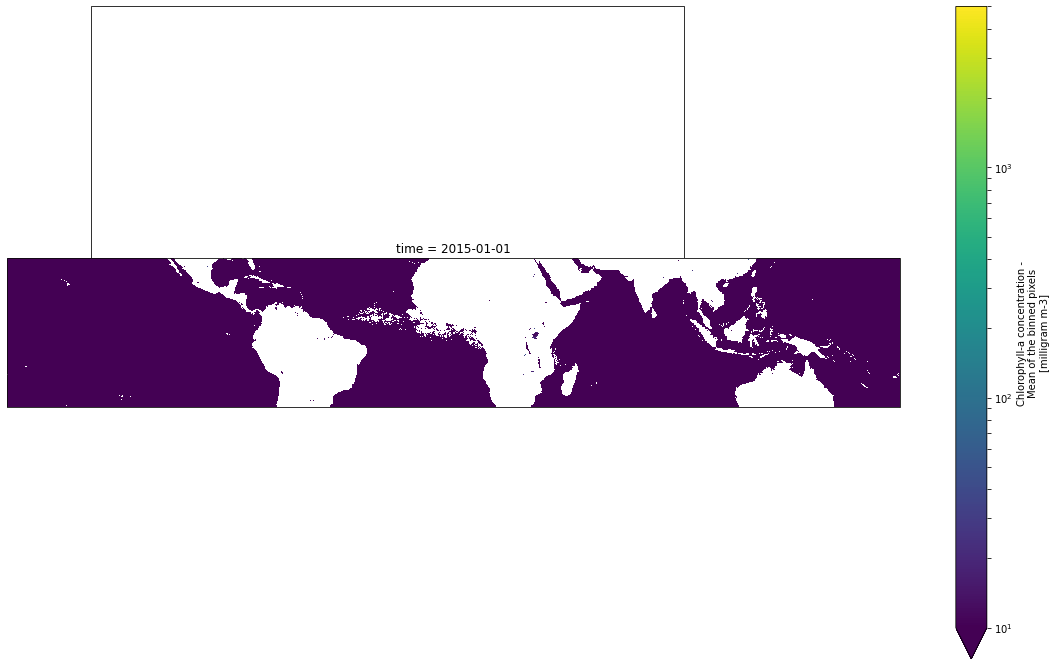

In [33]:


fig = plt.figure(figsize=[20,12])
gs = gridspec.GridSpec(2, 2,width_ratios=[3, 1])


ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
chl.plot(ax=ax, norm=mpl.colors.SymLogNorm(10), **k_map_kwargs)

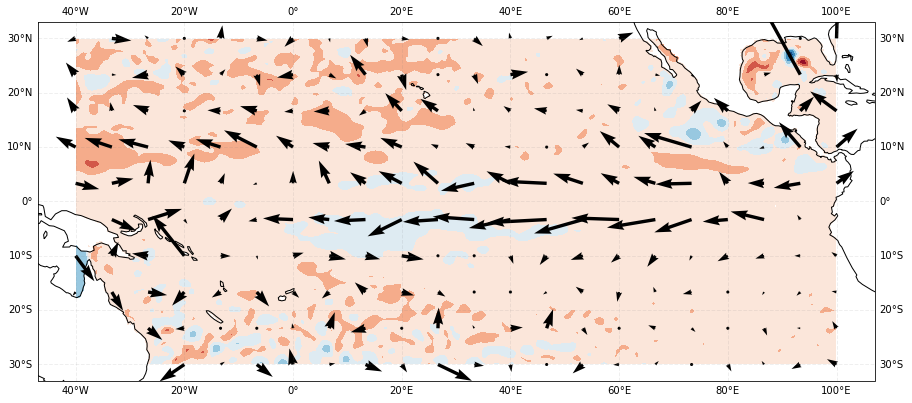

In [11]:

# plot quick map with positions


plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.gridlines(crs=ccrs.PlateCarree(central_longitude=180), draw_labels=True,
             linewidth=1, color='gray', alpha=0.12, linestyle='--')
ax.coastlines()

ax.contourf(ssh.longitude, ssh.latitude,ssh.sla.isel(time=0),cmap='RdBu',transform=ccrs.PlateCarree())
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 8
}

u_vel= u.U.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.V.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
ax.quiver(lon_skipped, 
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec)



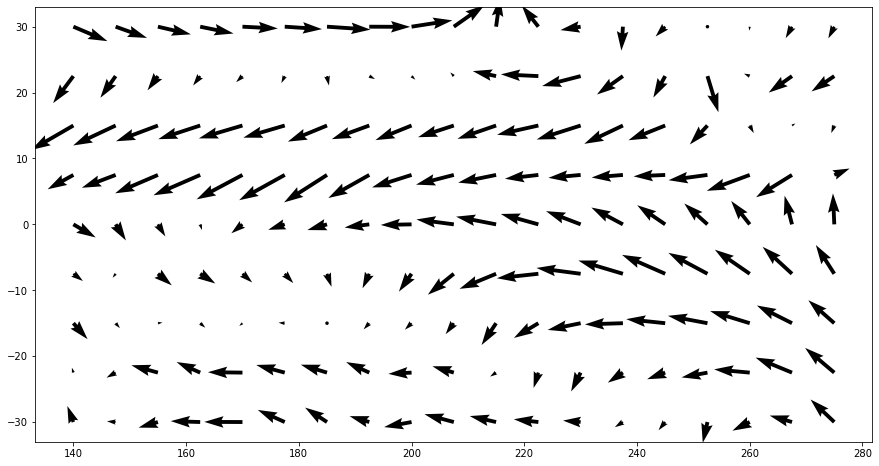

In [46]:


plt.figure(figsize=(15,8))



TypeError: Argument 'x' has incorrect type (expected numpy.ndarray, got DataArray)

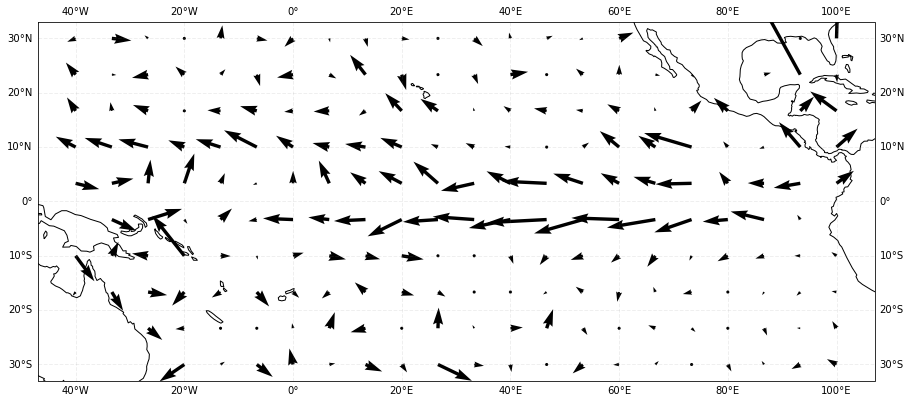

In [59]:

plt.figure(figsize=(15,8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.gridlines(crs=ccrs.PlateCarree(central_longitude=180), draw_labels=True,
             linewidth=1, color='gray', alpha=0.12, linestyle='--')
ax.coastlines()

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 8
}

u_vel= u.U.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.V.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
ax.quiver(lon_skipped, 
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec)

skip=30
lon_wind_skipped =  wind.longitude[::skip]
lat_wind_skipped = wind.latitude[::skip]
kw_vec1 = {
    'scale': 150
}


ax.quiver(lon_wind_skipped, 
           lat_wind_skipped,
           wind.u.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),
           wind.v.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),transform=ccrs.PlateCarree(),color='r',**kw_vec1)


In [131]:
u_1deg = u.coarsen(latitude=9,longitude=9,boundary='trim').mean()
v_1deg = v.coarsen(latitude=9,longitude=9,boundary='trim').mean()

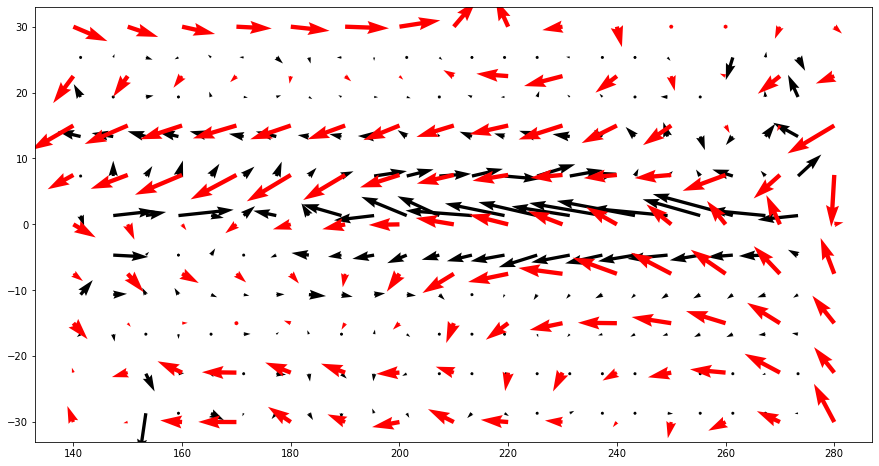

In [134]:
plt.figure(figsize=(15,8))
#ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))


skip=2
lon_skipped =  u_1deg.longitude[::skip]
lat_skipped = u_1deg.latitude[::skip]
kw_vec = {
    'scale': 8
}

u_vel= u_1deg.U.isel(TIME=0,LEV=0).sel(longitude=lon_skipped,latitude =lat_skipped).values
v_vel = v_1deg.V.isel(TIME=0,LEV=0).sel(longitude=lon_skipped,latitude =lat_skipped).values
plt.quiver(lon_skipped, 
           lat_skipped,
           u_vel,v_vel,
           **kw_vec)




skip1=30
lon_wind_skipped =  wind.longitude[::skip1]
lat_wind_skipped = wind.latitude[::skip1]
kw_vec = {
    'scale': 150
}


plt.quiver(lon_wind_skipped, 
           lat_wind_skipped,
           wind.u.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),
           wind.v.isel(time=0).sel(longitude=lon_wind_skipped,latitude =lat_wind_skipped),**kw_vec,color='r')



TypeError: Argument 'x' has incorrect type (expected numpy.ndarray, got DataArray)

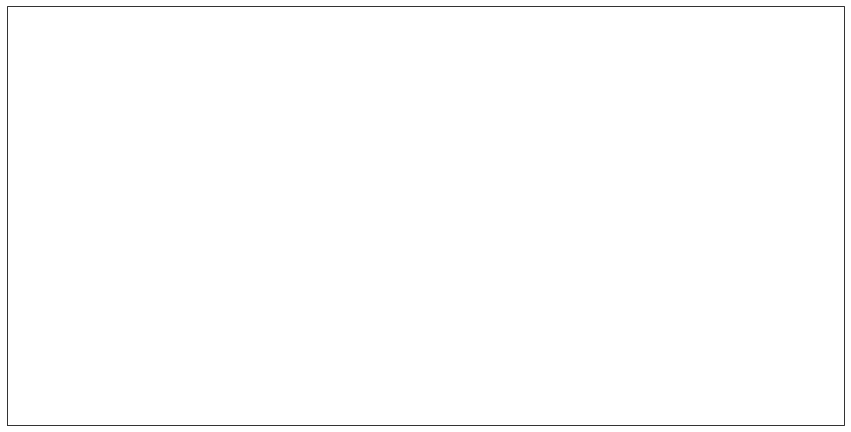

In [44]:


## the current direction
skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 6
}

u_vel= u.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
ax.quiver(lon_skipped, 
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec,color='k')

/home/pab21003/class_marn5895/miniconda/envs/marn5895/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1586: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


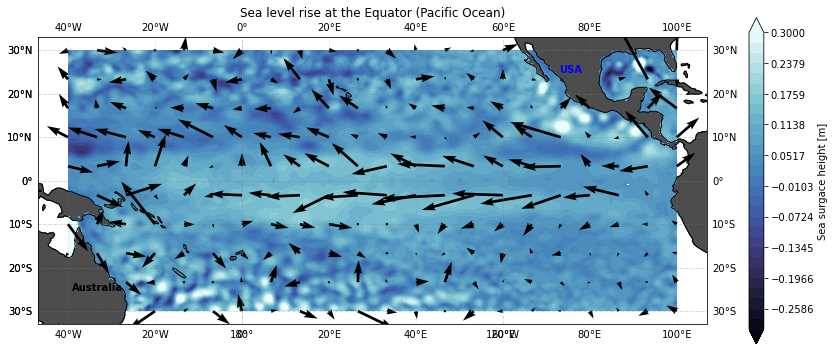

In [42]:
#creating regional boundaries
lonmin = ssh.longitude.min()
lonmax = ssh.longitude.max()
latmin = ssh.latitude.min()
latmax = ssh.latitude.max()

regional_extent = [lonmin, lonmax, latmin, latmax]
plt.figure(figsize=(15,8))
ax.coastlines()
ax.set_extent(regional_extent)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.gridlines(crs=ccrs.PlateCarree(central_longitude=180), draw_labels=True,
             linewidth=1, color='gray', alpha=0.12, linestyle='--')
ax.coastlines()
cmap=cmo.cm.ice

kw = {
    'cmap': cmap,
    'extend': 'both',
    'add_colorbar':False,
    # 'vmax' : 0.3,
    # 'vmin' : -0.3

}

states = cfeature.NaturalEarthFeature(
       category='cultural',
       name='admin_1_states_provinces_lines',
       scale='10m',
       facecolor='none')

im=ax.contourf(ssh.longitude, ssh.latitude,ssh.sla.isel(time=0),np.linspace(-0.3,0.3,30),transform=ccrs.PlateCarree(),**kw)
plt.colorbar(im, shrink=0.75, label='Sea surgace height [m]')
ax.text(-39,-25.2,'Australia',fontsize=10, fontweight='bold')
ax.text(73,25,'USA',fontsize=10, fontweight='bold', color='blue')
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True, linewidth=1, color='gray', alpha=0.18,linestyle='--')

ax.add_feature(cfeature.LAND, facecolor='0.3', edgecolor='0.2') 
# ax.add_feature(cartopy.feature.RIVERS,zorder=3)
# ax.add_feature(states, edgecolor='grey', zorder=5)

#remove top and right (redundant) lat/lon labels
gl.top_labels=False
gl.right_labels=False

ax.set_title('Sea level rise at the Equator (Pacific Ocean)')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

## the current direction
skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 6
}

u_vel= u.U.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.V.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
plt.quiver(lon_skipped,
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec)


#plt.savefig('SSH_current.png',bbox_inches='tight',dpi=125)

In [ ]:
plt.figure(figsize=(15,6))
ax = plt.axes(projection=ccrs.PlateCarree())
cp = monthly_ds.sla.isel(time=0).plot(robust=True)
ax.add_feature(cfeature.LAND, facecolor='0.3', edgecolor='0.2') 

In [27]:
lat_skipped

<xarray.Dataset>
Dimensions:         (TIME: 12, LON1_1021: 421, bnds: 2, LAT: 181, LEV: 1)
Coordinates:
  * TIME            (TIME) datetime64[ns] 2015-01-31 2015-02-28 ... 2015-12-31
  * LON1_1021       (LON1_1021) float64 140.0 140.3 140.7 ... 279.3 279.7 280.0
  * LAT             (LAT) float64 -30.0 -29.67 -29.33 -29.0 ... 29.33 29.67 30.0
  * LEV             (LEV) float64 15.0
Dimensions without coordinates: bnds
Data variables:
    LON1_1021_bnds  (TIME, LON1_1021, bnds) float64 139.8 140.2 ... 279.8 280.2
    LAT_bnds        (TIME, LAT, bnds) float64 -30.17 -29.83 ... 29.83 30.17
    U               (TIME, LEV, LAT, LON1_1021) float32 nan nan ... 0.07308

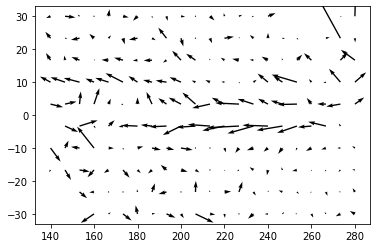

In [24]:

## the current direction
skip=20
lon_skipped =  u.LON1_1021[::skip]
lat_skipped = u.LAT[::skip]
kw_vec = {
    'scale': 6
}

u_vel= u.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
v_vel = v.isel(TIME=0,LEV=0).sel(LON1_1021=lon_skipped,LAT =lat_skipped).values
plt.quiver(lon_skipped,
           lat_skipped,
           u_vel,
           v_vel,transform=ccrs.PlateCarree(),**kw_vec)

In [ ]:
chl

In [94]:
### Resample every month
### and plot the January month 
chl.where((chl.lon>=140)&(chl.lon<=-80),drop=True)
#chl.where(,drop=True)

<xarray.DataArray 'CHL' (lat: 1441, lon: 0)>
array([], shape=(1441, 0), dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

In [87]:
chl

<xarray.DataArray 'CHL' (lat: 1441, lon: 0)>
array([], shape=(1441, 0), dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-01-01
  * lat      (lat) float32 30.02 29.98 29.94 29.9 ... -29.85 -29.9 -29.94 -29.98
  * lon      (lon) float32 
Attributes:
    input_files_reprocessings:  Processors versions: MODIS 2018.1/VIIRSN 2018...
    long_name:                  Chlorophyll-a concentration - Mean of the bin...
    valid_min:                  0.0
    valid_max:                  1000.0
    standard_name:              mass_concentration_of_chlorophyll_a_in_sea_water
    units:                      milligram m-3
    type:                       surface
    _ChunkSizes:                [  1 256 256]

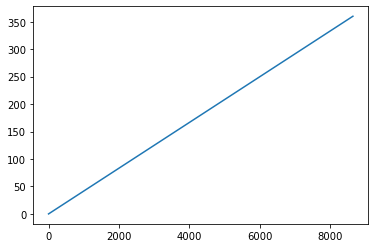

In [85]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.CHL.isel(time=0).lon,chl.CHL.isel(time=0).lat,chl.CHL.isel(time=0),locator=ticker.LogLocator())

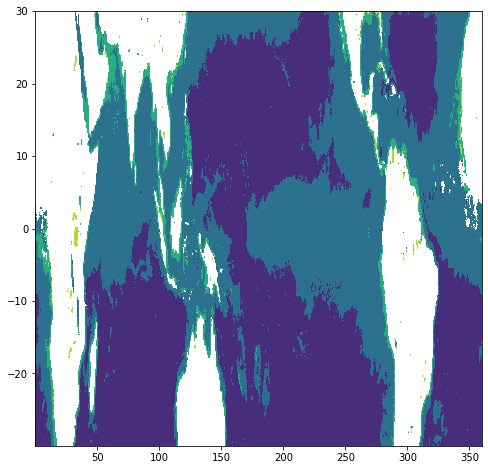

In [30]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.lon,chl.lat,chl,locator=ticker.LogLocator())

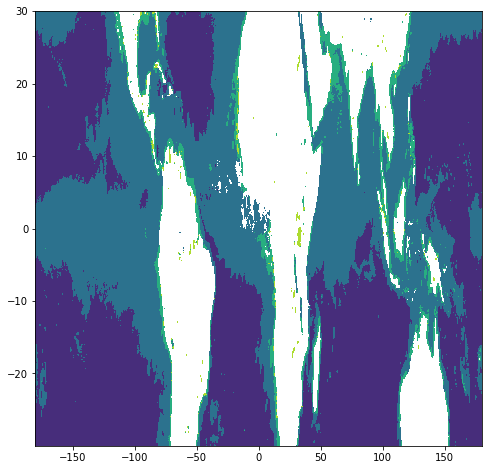

In [55]:
fig = plt.figure(figsize=(8,8))
plt.contourf(chl.CHL.isel(time=0).lon,chl.CHL.isel(time=0).lat,chl.CHL.isel(time=0),locator=ticker.LogLocator())

In [ ]:
chl.sel(lon=slice(140,-80))